In [ ]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext) 
font_add_google("Poppins", "pop")
showtext_auto()

Loading required package: pacman



In [2]:
carpetas <- read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/carpetas/carpetasFGJ_acumulado_2024_09.csv')%>%
  filter(alcaldia_hecho != 'FUERA DE CDMX',
         anio_hecho %in% c(2016:2024))%>%
#Identificadores de categorías de delitos

mutate(
    #3 delitos de menor cifra negra: robo a casa, robo de vehículo y homicidio doloso
    III_delitos = case_when(categoria_delito %in% c('ROBO A CASA HABITACION CON VIOLENCIA','ROBO A CASA HABITACION SIN VIOLENCIA','ROBO DE VEHICULO CON Y SIN VIOLENCIA','HOMICIDIO DOLOSO') ~ 1,
    TRUE ~ 0),
#5 delitos de indicador propuesto en un momento
    V_delitos = case_when(categoria_delito %in% c('HOMICIDIO DOLOSO','ROBO A NEGOCIO CON VIOLENCIA','ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA','ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA','ROBO DE VEHÍCULO CON Y SIN VIOLENCIA') ~ 1,
    TRUE ~ 0),
#Delitos de alto impacto
    alto_impacto = case_when(categoria_delito %in% c('ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
                                                     'HOMICIDIO DOLOSO',
                                                     'ROBO DE VEHICULO CON Y SIN VIOLENCIA',
                                                     'ROBO A NEGOCIO CON VIOLENCIA',
                                                      'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
                                                     'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
                                                     'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
                                                     'VIOLACIÓN',
                                                     'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
                                                     'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
                                                     'ROBO A CASA HABITACIÓN CON VIOLENCIA',
                                                     'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
                                                     'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
                                                        'SECUESTRO') ~ 1,
                            TRUE ~ 0),
##Delitos con perspectiva de género
    perspectiva_genero = case_when(delito %in% c('ABUSO SEXUAL',
                                                 'ACOSO SEXUAL',
                                                 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
                                                 'CONTRA LA INTIMIDAD SEXUAL',
                                                 'FEMINICIDIO',
                                                 'FEMINICIDIO POR ARMA BLANCA',
                                                 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO',
                                                 'FEMINICIO POR GOLPES',
                                                 'HOMICIDIO POR ARMA BLANCA',
                                                 'HOMICIDIO POR ARMA DE FUEGO',
                                                 'HOMICIDIO POR GOLPES',
                                                 'HOMICIDIOS INTENCIONALES (OTROS)',
                                                 'LESIONES INTENCIONALES',
                                                 'LESIONES INTENCIONALES POR ARMA BLANCA',
                                                 'LESIONES INTENCIONALES POR ARMA DE FUEGO',
                                                  'LESIONES INTENCIONALES POR GOLPES',
                                                 'PLAGIO O SECUESTRO',
                                                 'TRATA DE PERSONAS',
                                                 'VIOLACION',
                                                 'VIOLACION EQUIPARADA',
                                                 'VIOLACION EQUIPARADA POR CONOCIDO',
                                                 'VIOLACION TUMULTUARIA',
                                                 'VIOLENCIA FAMILIAR') ~ 1,
                            TRUE ~ 0)
)

Rows: 2025785 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): mes_inicio, mes_hecho, delito, categoria_delito, competencia, fis...
dbl   (4): anio_inicio, anio_hecho, latitud, longitud
date  (2): fecha_inicio, fecha_hecho
time  (2): hora_inicio, hora_hecho

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(carpetas)

anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,⋯,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud,III_delitos,V_delitos,alto_impacto,perspectiva_genero
<dbl>,<chr>,<date>,<time>,<dbl>,<chr>,<date>,<time>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,00:20:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,⋯,Barrio San Antonio Culhuacan,IZTAPALAPA,Iztapalapa,CDMX,19.34080,-99.11431,0,1,1,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,01:45:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION,DELITO DE BAJO IMPACTO,⋯,Cerro De La Estrella,IZTAPALAPA,Iztapalapa,CDMX,19.31861,-99.07572,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,01:15:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,⋯,Nextitla,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.45716,-99.17253,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,01:30:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,⋯,Los Cedros,COYOACAN,Coyoacán,CDMX,19.31267,-99.11181,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,02:00:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DELITO DE BAJO IMPACTO,⋯,Pueblo Santa Maria Malinalco,AZCAPOTZALCO,Azcapotzalco,CDMX,19.47936,-99.17994,0,0,0,0
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,04:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,⋯,NA,VENUSTIANO CARRANZA,NA,CDMX,NA,NA,0,0,0,0


In [4]:
print(unique(carpetas$alcaldia_hecho))
print(unique(carpetas$categoria_delito))

 [1] "IZTAPALAPA"             "MIGUEL HIDALGO"         "COYOACAN"              
 [4] "AZCAPOTZALCO"           "VENUSTIANO CARRANZA"    "IZTACALCO"             
 [7] "ALVARO OBREGON"         "CUAUHTEMOC"             "BENITO JUAREZ"         
[10] "GUSTAVO A. MADERO"      "TLALPAN"                "TLAHUAC"               
[13] "MILPA ALTA"             "CUAJIMALPA DE MORELOS"  "XOCHIMILCO"            
[16] "LA MAGDALENA CONTRERAS" "CDMX (indeterminada)"  
 [1] "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"   
 [2] "DELITO DE BAJO IMPACTO"                                 
 [3] "ROBO A NEGOCIO CON VIOLENCIA"                           
 [4] "LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO"          
 [5] "HECHO NO DELICTIVO"                                     
 [6] "HOMICIDIO DOLOSO"                                       
 [7] "ROBO A CASA HABITACIÓN CON VIOLENCIA"                   
 [8] "ROBO DE VEHÍCULO CON Y SIN VIOLENCIA"                   
 [9] "ROBO A REPARTIDOR CON Y SIN VIOLENC

In [5]:
print(unique(carpetas$delito))

  [1] "ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA"                                                                                                                                  
  [2] "LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION"                                                                                                                            
  [3] "DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL"                                                                                                                                 
  [4] "ROBO A CASA HABITACION SIN VIOLENCIA"                                                                                                                                            
  [5] "DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO"                                                                                                                                   
  [6] "LESIONES CULPOSAS"                                                  

In [6]:
poblacion <- read_csv('https://conapo.segob.gob.mx/work/models/CONAPO/Datos_Abiertos/pry23/00_Pob_Mitad_1950_2070.csv', quote = ';')%>%
janitor::clean_names()

Rows: 737660 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ENTIDAD, SEXO
dbl (5): RENGLON, AÑO, CVE_GEO, EDAD, POBLACION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
pob_cdmx_t <- poblacion %>%
  filter(ano %in% c(2016:2024),
         cve_geo == 9,
         edad >= 18) %>% 
  select(-renglon) %>%
  group_by(ano, entidad, cve_geo) %>%
  summarise(poblacion_total = sum(poblacion), .groups = 'drop') %>% 
  group_by(ano)


  pob_cdmx_mujer <- poblacion %>%
  filter(ano %in% c(2016:2024),
         cve_geo == 9,
         edad >= 18,
            sexo == 'Mujeres') %>%
  select(-renglon) %>%
  group_by(ano, entidad, cve_geo) %>%
  summarise(pob_mujer = sum(poblacion), .groups = 'drop') %>%
  group_by(ano)
  
pob_cdmx<-pob_cdmx_t%>%
    left_join(pob_cdmx_mujer, by = c('ano'))%>%
    select(ano, poblacion_total, pob_mujer)
pob_cdmx


ano,poblacion_total,pob_mujer
<dbl>,<dbl>,<dbl>
2016,6909676,3667544
2017,6991272,3705850
2018,7074976,3745305
2019,7157355,3784450
2020,7197032,3805814
2021,7198885,3810026
2022,7222176,3821291
2023,7262596,3838867
2024,7300177,3854914


In [8]:
#Calcular promedio diario de delitos mensual
delitos_mensual <- carpetas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho),
         mes = month(fecha_hecho)) %>%
#Contabilizar los delitos por año y mes
    group_by(ano, mes) %>%
    summarise(III_delitos = sum(III_delitos),
                V_delitos = sum(V_delitos),
              alto_impacto = sum(alto_impacto),
              #perspectiva_genero = sum(perspectiva_genero),
                .groups = 'drop') %>%
#Obtener promedio diario de delitos
    mutate(promedio_diario_III = III_delitos / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))),
           promedio_diario_V = V_delitos / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))),
              promedio_diario_alto_impacto = alto_impacto / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))
               #promedio_diario_perspectiva_genero = perspectiva_genero / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))
delitos_mensual

ano,mes,III_delitos,V_delitos,alto_impacto,promedio_diario_III,promedio_diario_V,promedio_diario_alto_impacto
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,1,69,1969,1358,2.225806,63.51613,43.80645
2016,2,73,1946,1389,2.517241,67.10345,47.89655
2016,3,83,2102,1469,2.677419,67.80645,47.38710
2016,4,75,1957,1444,2.500000,65.23333,48.13333
2016,5,86,1930,1418,2.774194,62.25806,45.74194
2016,6,76,1698,1240,2.533333,56.60000,41.33333
2016,7,78,1732,1148,2.516129,55.87097,37.03226
2016,8,73,1925,1242,2.354839,62.09677,40.06452
2016,9,92,2116,1516,3.066667,70.53333,50.53333


In [9]:

delitos_mensual %>%
    pivot_longer(cols = c(promedio_diario_III, promedio_diario_V, promedio_diario_alto_impacto), #promedio_diario_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'promedio_diario')

ano,mes,III_delitos,V_delitos,alto_impacto,delito,promedio_diario
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2016,1,69,1969,1358,promedio_diario_III,2.225806
2016,1,69,1969,1358,promedio_diario_V,63.516129
2016,1,69,1969,1358,promedio_diario_alto_impacto,43.806452
2016,2,73,1946,1389,promedio_diario_III,2.517241
2016,2,73,1946,1389,promedio_diario_V,67.103448
2016,2,73,1946,1389,promedio_diario_alto_impacto,47.896552
2016,3,83,2102,1469,promedio_diario_III,2.677419
2016,3,83,2102,1469,promedio_diario_V,67.806452
2016,3,83,2102,1469,promedio_diario_alto_impacto,47.387097


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


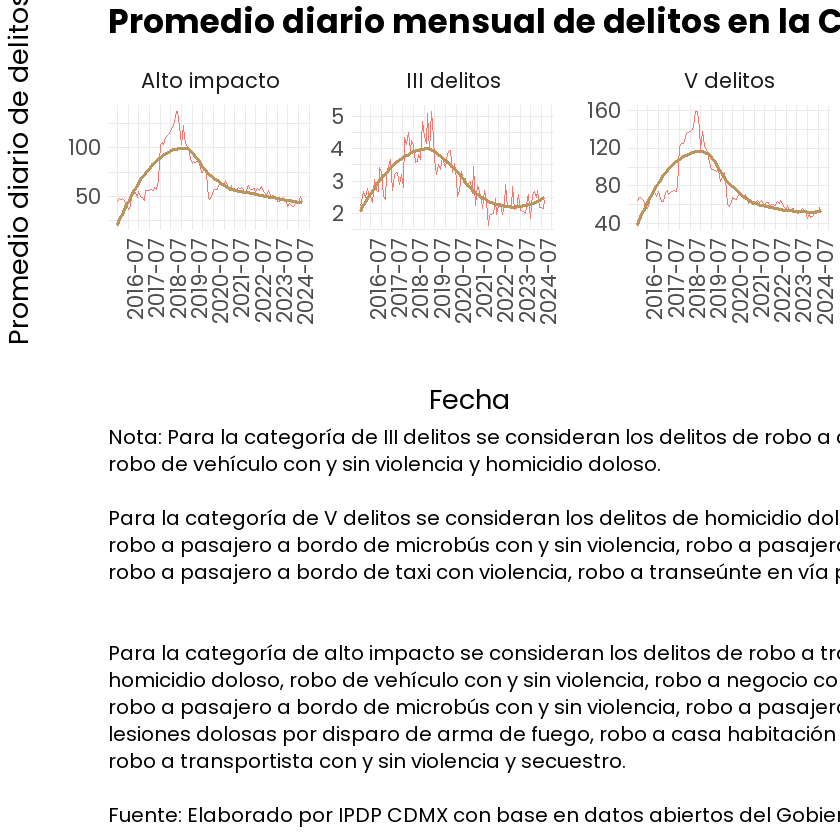

In [10]:
# Gráfica de promedio diario de III y V delitos en una misma gráfica

delitos_mensual %>%
    pivot_longer(cols = c(promedio_diario_III, promedio_diario_V, promedio_diario_alto_impacto), #promedio_diario_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'promedio_diario') %>%
    select(ano, mes, delito, promedio_diario) %>%
    mutate(delito = recode(delito,
                           promedio_diario_III = "III delitos",
                           promedio_diario_V = "V delitos",
                           promedio_diario_alto_impacto = "Alto impacto"))%>%
                           #promedio_diario_perspectiva_genero = "Perspectiva de género")) %>%
    ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario, color = '#691c32')) +
    geom_line() +
    geom_smooth(method = 'loess', se = FALSE, color = '#bc955c') +
    labs(title = 'Promedio diario mensual de delitos en la Ciudad de México, 2016-2024',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption = "Nota: Para la categoría de III delitos se consideran los delitos de robo a casa habitación con y sin violencia,
robo de vehículo con y sin violencia y homicidio doloso.

Para la categoría de V delitos se consideran los delitos de homicidio doloso, robo a negocio con violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de taxi con violencia, robo a transeúnte en vía pública con y sin violencia y robo de vehículo con y sin violencia.


Para la categoría de alto impacto se consideran los delitos de robo a transeúnte en vía pública con y sin violencia,
homicidio doloso, robo de vehículo con y sin violencia, robo a negocio con violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo de taxi con violencia, violación, robo a repartidor con y sin violencia,
lesiones dolosas por disparo de arma de fuego, robo a casa habitación con violencia, robo a cuentahabiente saliendo del cajero con violencia,
robo a transportista con y sin violencia y secuestro.

Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México") +
    theme_minimal() +
    scale_x_date(date_labels = '%Y-%m', date_breaks = '12 months') +
    scale_y_continuous(labels = scales::comma) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20)) +
    facet_wrap(~delito, scales = 'free_y', ncol = 3)

# Salvar gráfica
ggsave('delitos_mensual.png', width = 20, height = 10, units = 'in', dpi = 100, bg = "white")


In [11]:
#Calcular delitos anuales
delitos_anuales <- carpetas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho)) %>%
#Contabilizar los delitos de III y V delitos por año
    group_by(ano) %>%
    summarise(III_delitos = sum(III_delitos),
                V_delitos = sum(V_delitos),
                alto_impacto = sum(alto_impacto),
                #perspectiva_genero = sum(perspectiva_genero),
                .groups = 'drop')%>%
#Calcular promedio diario anual
    mutate(promedio_diario_III = III_delitos / 365,
           promedio_diario_V = V_delitos / 365,
                promedio_diario_alto_impacto = alto_impacto / 365)%>%
                    #promedio_diario_perspectiva_genero = perspectiva_genero / 365)%>%
#Pegar población
    left_join(pob_cdmx, by = 'ano')%>%
#Calcular tasa de delitos por cada 100,000 habitantes
    mutate(tasa_III = (III_delitos / poblacion_total) * 100000,
           tasa_V = (V_delitos / poblacion_total) * 100000,
                tasa_alto_impacto = (alto_impacto / poblacion_total) * 100000)
                   # tasa_perspectiva_genero = (perspectiva_genero / pob_mujer) * 100000)
delitos_anuales

ano,III_delitos,V_delitos,alto_impacto,promedio_diario_III,promedio_diario_V,promedio_diario_alto_impacto,poblacion_total,pob_mujer,tasa_III,tasa_V,tasa_alto_impacto
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,975,24030,16981,2.671233,65.83562,46.52329,6909676,3667544,14.110647,347.7732,245.7568
2017,1128,26324,20216,3.090411,72.12055,55.38630,6991272,3705850,16.134403,376.5266,289.1605
2018,1447,50237,43021,3.964384,137.63562,117.86575,7074976,3745305,20.452366,710.0660,608.0727
2019,1466,39029,34145,4.016438,106.92877,93.54795,7157355,3784450,20.482427,545.2992,477.0617
2020,1207,26390,22262,3.306849,72.30137,60.99178,7197032,3805814,16.770802,366.6789,309.3220
2021,983,23543,21687,2.693151,64.50137,59.41644,7198885,3810026,13.654892,327.0368,301.2550
2022,786,22159,20840,2.153425,60.70959,57.09589,7222176,3821291,10.883147,306.8189,288.5557
2023,834,19806,17873,2.284932,54.26301,48.96712,7262596,3838867,11.483497,272.7124,246.0966
2024,647,13765,11697,1.772603,37.71233,32.04658,7300177,3854914,8.862799,188.5571,160.2290


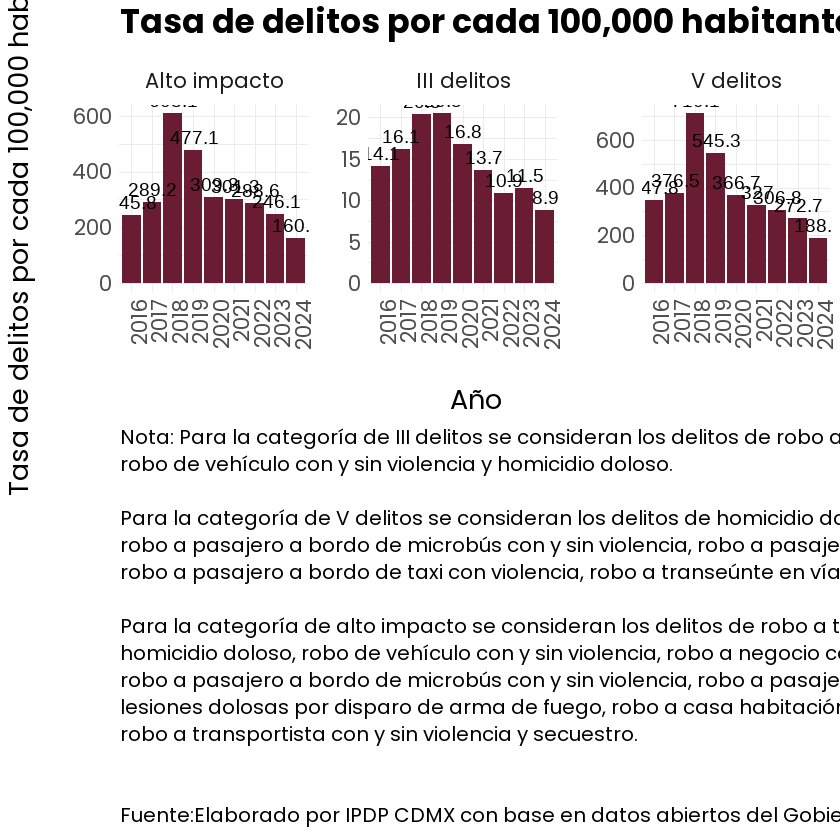

In [12]:
#Gráfica de tasa de delitos por cada 100,000 habitantes
delitos_anuales %>%
    pivot_longer(cols = c(tasa_III, tasa_V, tasa_alto_impacto), #tasa_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'tasa') %>%
select(ano, delito, tasa) %>%
    mutate(delito = recode(delito,
                            tasa_III = "III delitos",
                            tasa_V = "V delitos",
                            tasa_alto_impacto = "Alto impacto"))%>%
                           # tasa_perspectiva_genero = "Perspectiva de género"))%>%
        ggplot(aes(x = factor(ano), y = tasa)) +
        geom_col(position = 'dodge',fill='#691c32') +
          geom_text(aes(label = round(tasa, 1)),
              position = position_dodge(width = 0.9),
              vjust = -0.5,
              size = 5) +
        facet_wrap(~delito, scales = 'free_y', ncol = 3) +
        labs(title = 'Tasa de delitos por cada 100,000 habitantes en la Ciudad de México, 2016-2024',
             x = 'Año',
             y = 'Tasa de delitos por cada 100,000 habitantes',
             caption="Nota: Para la categoría de III delitos se consideran los delitos de robo a casa habitación con y sin violencia,
robo de vehículo con y sin violencia y homicidio doloso.

Para la categoría de V delitos se consideran los delitos de homicidio doloso, robo a negocio con violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de taxi con violencia, robo a transeúnte en vía pública con y sin violencia y robo de vehículo con y sin violencia.

Para la categoría de alto impacto se consideran los delitos de robo a transeúnte en vía pública con y sin violencia,
homicidio doloso, robo de vehículo con y sin violencia, robo a negocio con violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo de taxi con violencia, violación, robo a repartidor con y sin violencia,
lesiones dolosas por disparo de arma de fuego, robo a casa habitación con violencia, robo a cuentahabiente saliendo del cajero con violencia,
robo a transportista con y sin violencia y secuestro.


Fuente:Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México y CONAPO. Proyecciones de población"
                ) +
            theme_minimal() +
            #scale_fill_manual(values = c("III delitos" = "#235b4e", "V delitos" = "#691c32")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1),
                plot.title = element_text(hjust = 0, size = 25, face = "bold"),
                plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
                plot.caption = element_text(hjust = 0, size = 15),
                legend.position = "none",
                text = element_text(family = "pop", size = 20))

#Salvar gráfica
ggsave('tasa_delitos.png', width = 20, height = 10
       , units = 'in',,dpi=100,bg="white")

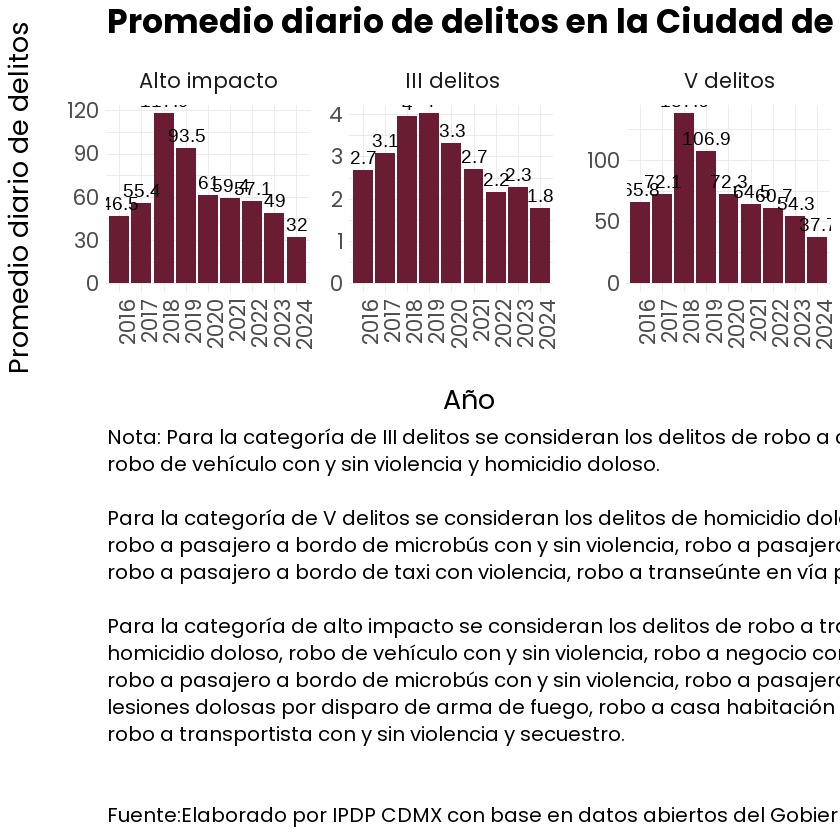

In [13]:
#Gráfica de tasa de delitos por cada 100,000 habitantes
delitos_anuales %>%
    pivot_longer(cols = c(promedio_diario_III, promedio_diario_V, promedio_diario_alto_impacto), #promedio_diario_perspectiva_genero),
                 names_to = 'delito',
                 values_to = 'promedio') %>%
select(ano, delito, promedio) %>%
    mutate(delito = recode(delito,
                            promedio_diario_III = "III delitos",
                            promedio_diario_V = "V delitos",
                            promedio_diario_alto_impacto = "Alto impacto"))%>%
                            #promedio_diario_perspectiva_genero = "Perspectiva de género"))%>%
        ggplot(aes(x = factor(ano), y = promedio)) +
        geom_col(position = 'dodge',fill='#691c32') +
          geom_text(aes(label = round(promedio, 1)),
              position = position_dodge(width = 0.9),
              vjust = -0.5,
              size = 5) +
        facet_wrap(~delito, scales = 'free_y', ncol = 3) +
        labs(title = 'Promedio diario de delitos en la Ciudad de México por año, 2016-2024',
             x = 'Año',
             y = 'Promedio diario de delitos',
             caption="Nota: Para la categoría de III delitos se consideran los delitos de robo a casa habitación con y sin violencia,
robo de vehículo con y sin violencia y homicidio doloso.

Para la categoría de V delitos se consideran los delitos de homicidio doloso, robo a negocio con violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de taxi con violencia, robo a transeúnte en vía pública con y sin violencia y robo de vehículo con y sin violencia.

Para la categoría de alto impacto se consideran los delitos de robo a transeúnte en vía pública con y sin violencia,
homicidio doloso, robo de vehículo con y sin violencia, robo a negocio con violencia, robo a pasajero a bordo del metro con y sin violencia,
robo a pasajero a bordo de microbús con y sin violencia, robo a pasajero a bordo de taxi con violencia, violación, robo a repartidor con y sin violencia,
lesiones dolosas por disparo de arma de fuego, robo a casa habitación con violencia, robo a cuentahabiente saliendo del cajero con violencia,
robo a transportista con y sin violencia y secuestro.


Fuente:Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México"
                ) +
            theme_minimal() +
            #scale_fill_manual(values = c("III delitos" = "#235b4e", "V delitos" = "#691c32")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1),
                plot.title = element_text(hjust = 0, size = 25, face = "bold"),
                plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
                plot.caption = element_text(hjust = 0, size = 15),
                legend.position = "none",
                text = element_text(family = "pop", size = 20))

#Salvar gráfica
ggsave('promedio_diario_anual.png', width = 20, height = 10
       , units = 'in',,dpi=100,bg="white")

In [14]:
##Víctimas en carpetas de investigación
victimas<-read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/victimas/victimasFGJ_acumulado_2024_09.csv')%>%
janitor::clean_names()%>%
#Filtrar mujeres
filter(sexo == 'Femenino',
       tipo_persona=='FISICA',
       alcaldia_hecho != 'FUERA DE CDMX')%>%
#Clasificar delitos con perspectiva de género
mutate(
    perspectiva_genero = case_when(delito %in% c('ABUSO SEXUAL',
                                                 'ACOSO SEXUAL',
                                                 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
                                                 'CONTRA LA INTIMIDAD SEXUAL',
                                                 'FEMINICIDIO',
                                                 'FEMINICIDIO POR ARMA BLANCA',
                                                 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO',
                                                 'FEMINICIDIO POR GOLPES',
                                                 'HOMICIDIO POR ARMA BLANCA',
                                                 'HOMICIDIO POR ARMA DE FUEGO',
                                                 'HOMICIDIO POR GOLPES',
                                                 'HOMICIDIOS INTENCIONALES (OTROS)',
                                                 'LESIONES INTENCIONALES',
                                                 'LESIONES INTENCIONALES POR ARMA BLANCA',
                                                 'LESIONES INTENCIONALES POR ARMA DE FUEGO',
                                                  'LESIONES INTENCIONALES POR GOLPES',
                                                 'PLAGIO O SECUESTRO',
                                                 'TRATA DE PERSONAS',
                                                 'VIOLACION',
                                                 'VIOLACION EQUIPARADA',
                                                 'VIOLACION EQUIPARADA POR CONOCIDO',
                                                 'VIOLACION TUMULTUARIA',
                                                 'VIOLENCIA FAMILIAR') ~ 1,
                            TRUE ~ 0))%>%
#Dejar solo aquellos que han sido víctimas
  filter(calidad_juridica %in% c(
    'OFENDIDO',
    'VICTIMA Y DENUNCIANTE',
    'VICTIMA',
    'OFENDIDO Y DENUNCIANTE',
    'CADAVER',
    'AGRAVIADO',
    'LESIONADO',
    'DENUNCIANTE Y VICTIMA'
  ))%>%
#Clasificar por delito general
mutate(
    delito_general = case_when(delito %in% c('ABUSO SEXUAL') ~ "ABUSO SEXUAL",
                                delito %in% c('ACOSO SEXUAL', 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES') ~ "ACOSO SEXUAL",
                                delito %in% c('CONTRA LA INTIMIDAD SEXUAL') ~ "CONTRA LA INTIMIDAD SEXUAL",
                                delito %in% c('FEMINICIDIO', 'FEMINICIDIO POR ARMA BLANCA', 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO', 'FEMINICIDIO POR GOLPES') ~ "FEMINICIDIO",
                                delito %in% c('HOMICIDIO POR ARMA BLANCA', 'HOMICIDIO POR ARMA DE FUEGO', 'HOMICIDIO POR GOLPES', 'HOMICIDIOS INTENCIONALES (OTROS)') ~ "HOMICIDIO DOLOSO",
                                delito %in% c('LESIONES INTENCIONALES', 'LESIONES INTENCIONALES POR ARMA BLANCA', 'LESIONES INTENCIONALES POR ARMA DE FUEGO', 'LESIONES INTENCIONALES POR GOLPES') ~ "LESIONES DOLOSAS",
                                delito %in% c('PLAGIO O SECUESTRO') ~ "SECUESTRO",
                                delito %in% c('TRATA DE PERSONAS') ~ "TRATA DE PERSONAS",
                                delito %in% c('VIOLACION', 'VIOLACION EQUIPARADA', 'VIOLACION EQUIPARADA POR CONOCIDO', 'VIOLACION TUMULTUARIA') ~ "VIOLACION",
                                delito %in% c('VIOLENCIA FAMILIAR') ~ "VIOLENCIA FAMILIAR",
                                TRUE ~ "OTROS"
    ))



Rows: 1415763 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): mes_inicio, mes_hecho, delito, categoria_delito, sexo, tipo_perso...
dbl   (5): anio_inicio, anio_hecho, edad, latitud, longitud
date  (2): fecha_inicio, fecha_hecho
time  (2): hora_inicio, hora_hecho

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
victimas_mensual <- victimas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho),
         mes = month(fecha_hecho)) %>%
filter(ano %in% c(2018:2024))%>%
#Contabilizar los delitos por año y mes
    group_by(ano, mes) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop') %>%
#Obtener promedio diario de delitos
    mutate(promedio_diario = victimas / days_in_month(as.Date(paste(ano, mes, '01', sep = '-')))
           )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


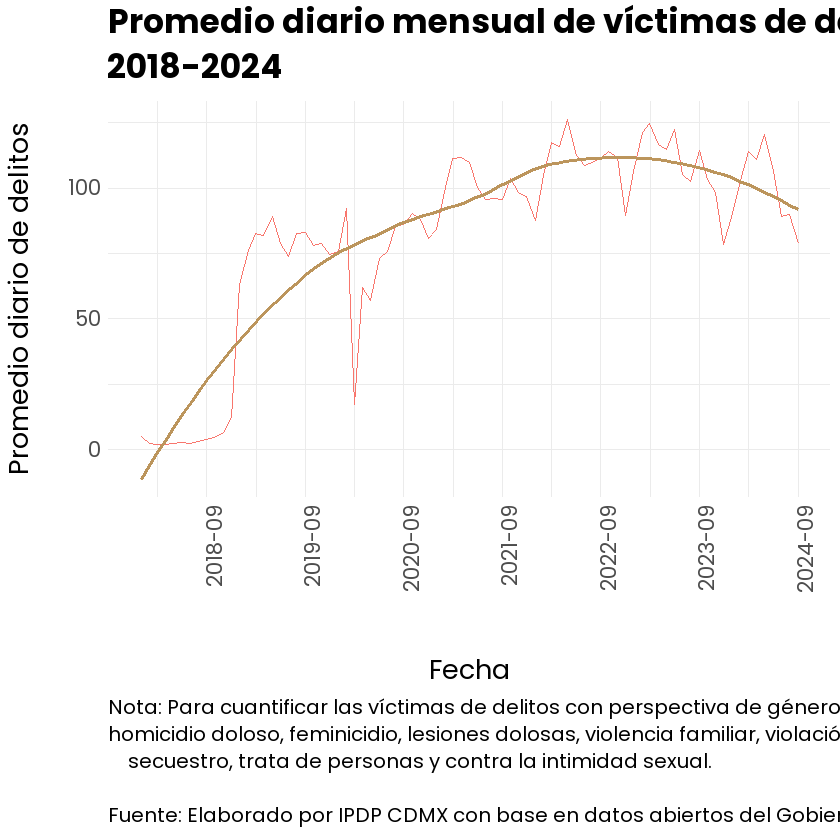

In [16]:
#Gráfica de promedio diario de víctimas de delitos con perspectiva de género
victimas_mensual %>%
    ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario, color = '#691c32')) +
    geom_line() +
    geom_smooth(method = 'loess', se = FALSE, color = '#bc955c') +
labs(title = 'Promedio diario mensual de víctimas de delitos con perspectiva de género en la Ciudad de México,
2018-2024',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption = "Nota: Para cuantificar las víctimas de delitos con perspectiva de género se consideran los delitos de
homicidio doloso, feminicidio, lesiones dolosas, violencia familiar, violación, abuso sexual, acoso sexual,
    secuestro, trata de personas y contra la intimidad sexual.

Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México") +
    theme_minimal() +
    scale_x_date(date_labels = '%Y-%m', date_breaks = '12 months') +
    scale_y_continuous(labels = scales::comma) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20))

# Salvar gráfica
ggsave('victimas_mensual.png', width = 18, height = 10, units = 'in', dpi = 100, bg = "white")


In [17]:
victimas_mensual_delitos <- victimas %>%
    mutate(fecha_hecho = as.Date(fecha_hecho),
             ano = year(fecha_hecho),
             mes = month(fecha_hecho)) %>%
    filter(ano %in% c(2018:2024),
              perspectiva_genero == 1)%>%
    group_by(ano, mes, delito_general) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop') %>%
    mutate(promedio_diario = victimas / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


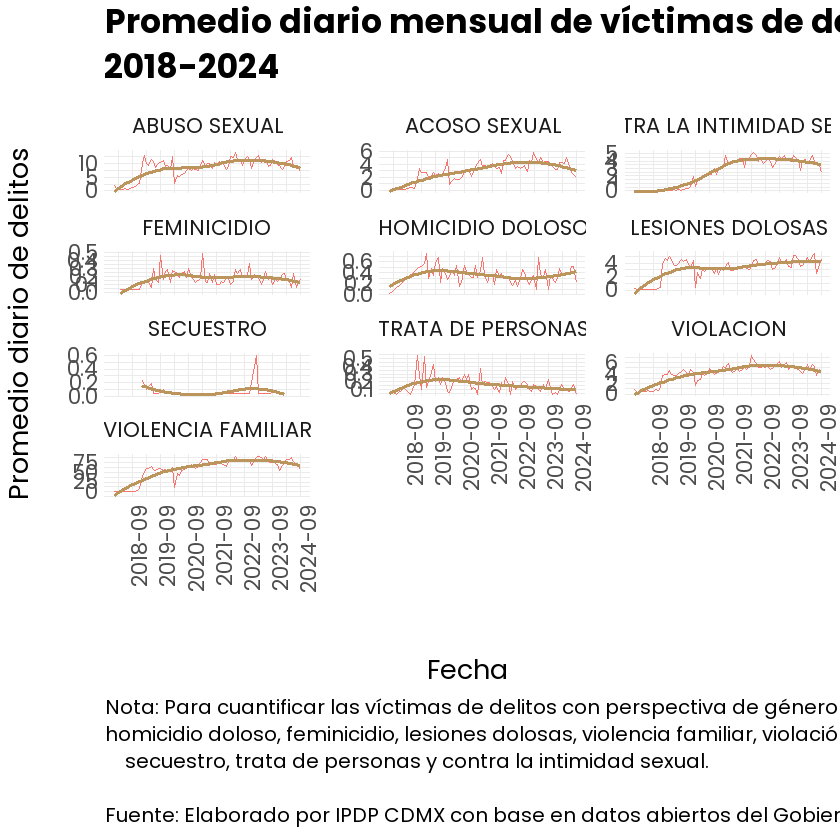

In [18]:
#Gráfica de promedio diario de victimas por facet de delitos
victimas_mensual_delitos %>%
    ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario, color = '#691c32')) +
    geom_line() +
    geom_smooth(method = 'loess', se = FALSE, color = '#bc955c') +
labs(title = 'Promedio diario mensual de víctimas de delitos con perspectiva de género en la Ciudad de México,
2018-2024',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption = "Nota: Para cuantificar las víctimas de delitos con perspectiva de género se consideran los delitos de
homicidio doloso, feminicidio, lesiones dolosas, violencia familiar, violación, abuso sexual, acoso sexual,
    secuestro, trata de personas y contra la intimidad sexual.

Fuente: Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México") +
    theme_minimal() +
    scale_x_date(date_labels = '%Y-%m', date_breaks = '12 months') +
    scale_y_continuous(labels = scales::comma) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0, size = 25, face = "bold"),
          plot.subtitle = element_text(hjust = 0, size = 20, face = "italic"),
          plot.caption = element_text(hjust = 0, size = 15),
          legend.position = "none",
          text = element_text(family = "pop", size = 20)) +
    facet_wrap(~delito_general, scales = 'free_y', ncol = 3)


# Salvar gráfica
ggsave('victimas_mensual_delitos.png', width = 18, height = 10, units = 'in', dpi = 100, bg = "white")


In [19]:
#Calcular victimas anuales
victimas_anuales <- victimas %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho)) %>%
filter(ano %in% c(2018:2024))%>%
#Contabilizar los delitos de III y V delitos por año
    group_by(ano) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop')%>%
#Calcular promedio diario anual
    mutate(promedio_diario = victimas / 365)
#Calcular tasa de crecimiento de 2021 a 20

victimas_anuales

ano,victimas,promedio_diario
<dbl>,<dbl>,<dbl>
2018,1467,4.019178
2019,28684,78.586301
2020,26861,73.591781
2021,36598,100.268493
2022,39805,109.054795
2023,39750,108.904110
2024,27499,75.339726


In [28]:
#Victimas 2023 por tipo de delito
victimas_anuales_delitos <- victimas %>%
    mutate(fecha_hecho = as.Date(fecha_hecho),
             ano = year(fecha_hecho)) %>%
    filter(ano %in% c(2023),
              perspectiva_genero == 1)%>%
    group_by(ano, delito_general) %>%
    summarise(victimas = sum(perspectiva_genero),
                .groups = 'drop') %>%
    #Porcentaje del total
    mutate(porcentaje =round((victimas/sum(victimas))*100,1))%>%
#Ordenar
    arrange(desc(victimas))%>%
janitor::adorn_totals(where = c("row"))
victimas_anuales_delitos

ano,delito_general,victimas,porcentaje
<chr>,<chr>,<dbl>,<dbl>
2023,VIOLENCIA FAMILIAR,29056,73.1
2023,ABUSO SEXUAL,3904,9.8
2023,VIOLACION,1942,4.9
2023,ACOSO SEXUAL,1608,4.0
2023,CONTRA LA INTIMIDAD SEXUAL,1503,3.8
2023,LESIONES DOLOSAS,1495,3.8
2023,HOMICIDIO DOLOSO,114,0.3
2023,FEMINICIDIO,63,0.2
2023,TRATA DE PERSONAS,41,0.1
